### Описание

В этом ноутбуке мы проведем небольшую аналитику собранных и предобработанных ранее данных с сайта "Кинопоиск"

#### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Загрузка данных

In [2]:
main_df = pd.read_csv('kinopoisk_prepared.csv', sep=';')
main_df.head()

,film_name,film_time_min,country,main_roles,genre,director,rating,url,film_year
0,Российская империя (сериал),60,Россия,"Леонид Парфенов, Елизавета Листова","документальный,история",Джаник Файзиев,8.8,https://www.kinopoisk.ru//film/453188/sr/1/,2000
1,Metallica: S&M (ТВ),145,США,"Metallica, Джеймс Хетфилд","документальный,музыка,концерт",Уэйн Ишам,8.6,https://www.kinopoisk.ru//film/337889/sr/1/,2000
2,Гладиатор,155,США,"Рассел Кроу, Хоакин Феникс","история,боевик,драма",Ридли Скотт,8.6,https://www.kinopoisk.ru//film/474/sr/1/,2000
3,Большой куш,104,Великобритания,"Джейсон Стэйтем, Стивен Грэм","криминал,комедия,боевик",Гай Ричи,8.5,https://www.kinopoisk.ru//film/526/sr/1/,2000
4,Близкие друзья (сериал),45,Канада,"Гейл Харольд, Хэл Спаркс","драма,мелодрама",Майкл ДеКарло,8.4,https://www.kinopoisk.ru//film/262973/sr/1/,2000


In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5932 entries, 0 to 5931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   film_name      5932 non-null   object 
 1   film_time_min  5932 non-null   int64  
 2   country        5932 non-null   object 
 3   main_roles     5932 non-null   object 
 4   genre          5932 non-null   object 
 5   director       5932 non-null   object 
 6   rating         5932 non-null   float64
 7   url            5932 non-null   object 
 8   film_year      5932 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 417.2+ KB


#### Задача №1
Вывести среднее значение рейтинга фильмов по годам, отсортировать по убыванию среднего рейтинга и вывести топ-5 позиций по среднему рейтингу

In [4]:
main_df.groupby('film_year', as_index=False) \
       .agg({'rating': 'mean'}) \
       .rename(columns={'rating': 'mean_rating'}) \
       .sort_values('mean_rating', ascending=False) \
       .head()

,film_year,mean_rating
11,2011,7.832982
10,2010,7.809790
12,2012,7.809123
19,2019,7.798872
14,2014,7.764982


#### Задача №2
Вывести информацию за 2011 год, у топ-5 стран по количеству снятых фильмов и их средний рейтинг

In [5]:
main_df.query('film_year == 2011') \
       .groupby('country', as_index=False) \
       .agg({'film_name': 'count', 'rating': 'mean'}) \
       .rename(columns={'film_name': 'film_count', 'rating': 'mean_rating'}) \
       .sort_values('film_count', ascending=False) \
       .head(5)

,country,film_count,mean_rating
19,США,93,7.836559
3,Великобритания,44,7.906818
18,Россия,31,7.770968
26,Япония,28,7.771429
14,Корея Южная,23,7.930435


#### Задача №3
Вывести информацию по режиссерам (топ-10), которые сняли наибольшее количество фильмов за период 2010-2020 год, а также средний рейтинг их фильмов за этот период

In [6]:
main_df.query('film_year >= 2010 & film_year <= 2020') \
       .groupby('director', as_index=False) \
       .agg({'film_name': 'count', 'rating': 'mean'}) \
       .rename(columns={'film_name': 'film_count', 'rating': 'mean_rating'}) \
       .sort_values('film_count', ascending=False) \
       .head(10)

,director,film_count,mean_rating
1114,Луис С.К.,8,7.737500
2067,Чо Су-вон,8,7.750000
1904,Тэцуро Амино,7,7.557143
1246,Масааки Юаса,7,7.800000
1689,Сергей Нурмамед,6,8.100000
1905,Тэцуро Араки,6,7.733333
796,Иван Соснин,6,7.466667
716,Дэвид Финчер,6,7.700000
1061,Ли Джон-хё,5,7.940000
1885,Томохико Ито,5,7.780000


#### Задача №4
Вывести информацию по наиболее успешным режиссерам (топ-10) снявших не менее 3-х фильмов: количество снятых фильмов, средний рейтинг этих фильмов

In [7]:
main_df.groupby('director', as_index=False) \
       .agg({'film_name': 'count', 'rating': 'mean'}) \
       .rename(columns={'film_name': 'film_count', 'rating': 'mean_rating'}) \
       .sort_values('mean_rating', ascending=False) \
       .query('film_count >= 3') \
       .head(10)

,director,film_count,mean_rating
3309,Франсуа Ансс,4,8.825000
264,Алтан Дёнмез,3,8.533333
717,Горо Танигути,3,8.466667
3763,Янн Артюс-Бертран,4,8.450000
1356,Изабель Кларк,3,8.433333
141,Аластер Фотергилл,5,8.420000
2005,Марина Мошкова,4,8.325000
1431,Каран Джохар,3,8.300000
1813,Ли Ын-бок,4,8.275000
3555,Щин Вон-хо,3,8.233333


#### Задача №5
Вывести топ-10 жанров с наиболее высоким средним рейтингом, также выведите количество фильмов к каждому жанру

In [8]:
main_df_cp = main_df.copy()

In [9]:
# Т.к. данные в столбце 'genre' в строковом формате, и фильм может относится сразу к нескольким жанрам,
# переформируем таблицу таким образом, чтобы в каждой записи был только один жанр

main_df_cp.genre = main_df_cp.genre.apply(lambda c: c.split(','))

main_df_cp = main_df_cp.explode('genre')

main_df_cp.head()

,film_name,film_time_min,country,main_roles,genre,director,rating,url,film_year
0,Российская империя (сериал),60,Россия,"Леонид Парфенов, Елизавета Листова",документальный,Джаник Файзиев,8.8,https://www.kinopoisk.ru//film/453188/sr/1/,2000
0,Российская империя (сериал),60,Россия,"Леонид Парфенов, Елизавета Листова",история,Джаник Файзиев,8.8,https://www.kinopoisk.ru//film/453188/sr/1/,2000
1,Metallica: S&M (ТВ),145,США,"Metallica, Джеймс Хетфилд",документальный,Уэйн Ишам,8.6,https://www.kinopoisk.ru//film/337889/sr/1/,2000
1,Metallica: S&M (ТВ),145,США,"Metallica, Джеймс Хетфилд",музыка,Уэйн Ишам,8.6,https://www.kinopoisk.ru//film/337889/sr/1/,2000
1,Metallica: S&M (ТВ),145,США,"Metallica, Джеймс Хетфилд",концерт,Уэйн Ишам,8.6,https://www.kinopoisk.ru//film/337889/sr/1/,2000


In [10]:
# Из получившейся таблицы выводим топ-10 жанров по среднему рейтингу

main_df_cp.groupby('genre', as_index=False) \
          .agg({'rating': 'mean', 'film_name': 'count'}) \
          .rename(columns={'film_name': 'film_count', 'rating': 'mean_rating'}) \
          .sort_values('mean_rating', ascending=False) \
          .head(10)

,genre,mean_rating,film_count
12,концерт,8.339394,33
19,новости,7.970000,10
6,детский,7.965574,61
24,ток-шоу,7.954545,22
9,игра,7.938462,13
7,документальный,7.934862,545
21,реальноеТВ,7.879487,39
16,музыка,7.829956,227
10,история,7.767416,267
18,мюзикл,7.751667,120


#### Задача №6
Вывести информацию по топ-10 стран по количеству снятых фильмов в разрезе по годам. Дополнительно необходимо визуализировать полученную информацию

In [11]:
#Сначала сформируем список топ-10 стран по количеству снятых фильмов

top_10_country_list = main_df.groupby('country', as_index=False) \
                             .agg({'film_name': 'count'}) \
                             .sort_values('film_name', ascending=False) \
                             .head(10) \
                             .country.to_list()
top_10_country_list

['США',
 'Россия',
 'Великобритания',
 'Япония',
 'Корея Южная',
 'Франция',
 'Индия',
 'Германия',
 'Канада',
 'Турция']

In [12]:
# Сформируем сводную таблицу с количеством фильмов по странам по годам 

film_year_count = main_df.query('country in @top_10_country_list') \
                         .groupby(['country', 'film_year'], as_index=False) \
                         .agg({'film_name': 'count'}) \
                         .rename(columns={'film_name': 'film_count'}) \
                         .pivot(index='country', columns='film_year', values='film_count') \
                         .fillna(0)
film_year_count

film_year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country,,,,,,,,,,,,,,,,,,,,,
Великобритания,31.0,32.0,38.0,35.0,38.0,37.0,35.0,40.0,35.0,27.0,...,44.0,42.0,37.0,28.0,31.0,31.0,24.0,26.0,32.0,24.0
Германия,14.0,14.0,8.0,7.0,9.0,4.0,12.0,7.0,8.0,5.0,...,7.0,1.0,5.0,6.0,8.0,1.0,8.0,8.0,7.0,5.0
Индия,5.0,8.0,8.0,9.0,10.0,7.0,13.0,14.0,12.0,13.0,...,9.0,14.0,13.0,17.0,9.0,6.0,1.0,3.0,1.0,1.0
Канада,13.0,12.0,8.0,9.0,12.0,8.0,7.0,3.0,7.0,5.0,...,6.0,6.0,4.0,3.0,6.0,1.0,6.0,2.0,2.0,1.0
Корея Южная,7.0,5.0,4.0,8.0,12.0,10.0,12.0,4.0,12.0,12.0,...,23.0,25.0,26.0,28.0,25.0,32.0,33.0,24.0,24.0,20.0
Россия,35.0,24.0,33.0,33.0,42.0,38.0,37.0,24.0,38.0,35.0,...,31.0,46.0,28.0,40.0,39.0,36.0,43.0,45.0,41.0,68.0
США,124.0,136.0,118.0,125.0,99.0,111.0,92.0,99.0,94.0,103.0,...,93.0,80.0,92.0,86.0,79.0,89.0,84.0,83.0,87.0,78.0
Турция,0.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,...,7.0,1.0,7.0,7.0,6.0,10.0,12.0,5.0,6.0,5.0
Франция,22.0,19.0,23.0,12.0,16.0,14.0,16.0,20.0,12.0,18.0,...,9.0,12.0,9.0,8.0,15.0,10.0,8.0,10.0,11.0,3.0


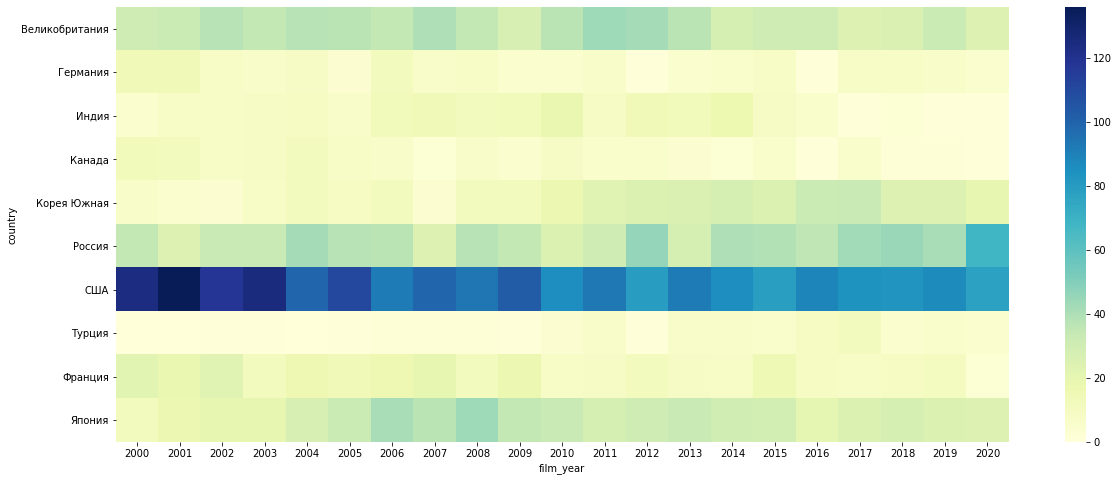

In [13]:
# Визуализируем полученные результаты с помощью "heatmap"

plt.figure(figsize=(20,8))
sns.heatmap(film_year_count, cmap="YlGnBu")

#### Задача №7
Позиции в датафрейме, продолжительность которых 60 минут и менее, скорее всего относятся к многосерийным картинам (сериалы, мультфильмы, документальные и проч.)

Выведите гистограмму с оценкой соотношения "полнометражная-многосерийная" картина в разрезе по периодам "2000-2010" и "2011-2020"

In [14]:
df_chrono = main_df.copy()
df_chrono['full'] = 'y'
df_chrono.loc[(df_chrono.film_time_min <= 60), 'full'] = 'n'

df_chrono['decade'] = '2000'
df_chrono.loc[(df_chrono.film_year >= 2011), 'decade'] = '2010'

df_chrono.head()

,film_name,film_time_min,country,main_roles,genre,director,rating,url,film_year,full,decade
0,Российская империя (сериал),60,Россия,"Леонид Парфенов, Елизавета Листова","документальный,история",Джаник Файзиев,8.8,https://www.kinopoisk.ru//film/453188/sr/1/,2000,n,2000
1,Metallica: S&M (ТВ),145,США,"Metallica, Джеймс Хетфилд","документальный,музыка,концерт",Уэйн Ишам,8.6,https://www.kinopoisk.ru//film/337889/sr/1/,2000,y,2000
2,Гладиатор,155,США,"Рассел Кроу, Хоакин Феникс","история,боевик,драма",Ридли Скотт,8.6,https://www.kinopoisk.ru//film/474/sr/1/,2000,y,2000
3,Большой куш,104,Великобритания,"Джейсон Стэйтем, Стивен Грэм","криминал,комедия,боевик",Гай Ричи,8.5,https://www.kinopoisk.ru//film/526/sr/1/,2000,y,2000
4,Близкие друзья (сериал),45,Канада,"Гейл Харольд, Хэл Спаркс","драма,мелодрама",Майкл ДеКарло,8.4,https://www.kinopoisk.ru//film/262973/sr/1/,2000,n,2000


In [15]:
#Группируем данные по десятилетиям и полнометражным/многосерийным картинам

df_chrono_group = df_chrono.groupby(['decade', 'full'], as_index=False) \
                             .agg({'film_name': 'count'}) \
                             .rename(columns={'film_name': 'film_count'})
df_chrono_group

,decade,full,film_count
0,2000,n,1003
1,2000,y,2206
2,2010,n,1409
3,2010,y,1314


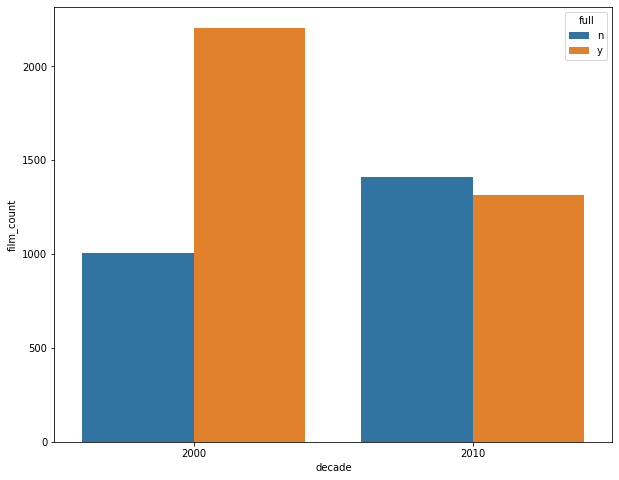

In [16]:
# Визуализируем данные

plt.figure(figsize=(10,8))

ax = sns.barplot(x="decade", y="film_count", hue="full", data=df_chrono_group)

#### Задача №8
Вывести топ-10 актеров, по количеству фильмов в которых они снялись

In [17]:
# Данные в столбце 'main_roles' также в строковом формате
# переформируем таблицу таким образом, чтобы в каждой записи был только один актер

main_df_cp = main_df.copy()

main_df_cp.main_roles = main_df_cp.main_roles.apply(lambda c: c.split(', '))

main_df_cp = main_df_cp.explode('main_roles')

main_df_cp.head()

,film_name,film_time_min,country,main_roles,genre,director,rating,url,film_year
0,Российская империя (сериал),60,Россия,Леонид Парфенов,"документальный,история",Джаник Файзиев,8.8,https://www.kinopoisk.ru//film/453188/sr/1/,2000
0,Российская империя (сериал),60,Россия,Елизавета Листова,"документальный,история",Джаник Файзиев,8.8,https://www.kinopoisk.ru//film/453188/sr/1/,2000
1,Metallica: S&M (ТВ),145,США,Metallica,"документальный,музыка,концерт",Уэйн Ишам,8.6,https://www.kinopoisk.ru//film/337889/sr/1/,2000
1,Metallica: S&M (ТВ),145,США,Джеймс Хетфилд,"документальный,музыка,концерт",Уэйн Ишам,8.6,https://www.kinopoisk.ru//film/337889/sr/1/,2000
2,Гладиатор,155,США,Рассел Кроу,"история,боевик,драма",Ридли Скотт,8.6,https://www.kinopoisk.ru//film/474/sr/1/,2000


In [18]:
# Выведем топ-10 актеров по количеству фильмов

main_df_cp.groupby('main_roles', as_index=False) \
          .agg({'film_name': 'count'}) \
          .rename(columns={'film_name': 'film_count'}) \
          .sort_values('film_count', ascending=False) \
          .head(10)

,main_roles,film_count
6287,Шах Рукх Кхан,26
2177,Дэвид Теннант,24
6074,Хироси Камия,20
6117,Хью Джекман,19
2019,Дзюн Фукуяма,17
1906,Джонни Депп,17
4756,Ритик Рошан,17
4809,Роберт Дауни мл.,16
3254,Леонардо ДиКаприо,16
869,Бенедикт Камбербэтч,16
